**Predicting Chest Pain Type Based on Age and Blood Pressure**

**Introduction:**
    
Chest pain is an extremely prevalent health complication around the world, with approximately 25% of the human population experiencing symptoms in their lifetime (Geyser and Smith, 2016). However, chest pain can be classified in 4 ways based on the primary cause of the pain. Typical angina is chest pain which is experienced by individuals who fail to get enough oxygen rich blood into parts of their heart muscle; it displays symptoms such as a squeezing, tightening, or heavy sensations in the chest cavity (Angina Pectoris, 2020). Atypical angina is similar to a typical angina but does not present in the same classical symptoms; some symptoms for atypical angina may include a burning or stabbing feeling in the chest, back pain, or upper abdominal pain (What Is Atypical Chest Pain). Non-anginal chest pain is pain which occurs behind the breast bone that is not related to the function of the heart; it usually has something to do with the function of the esophagus (Noncardiac Chest Pain: Symptoms, Causes and Treatments). Finally, asymptomatic chest pain has the same cause as a typical angina; however, the patient does not experience symptoms (Gul, 2013). Diagnosing the type of chest pain properly can be vital for prevention of heart attack, silent heart attack, and other detrimental heart conditions, like coronary heart disease. Our goal was to create a k-nn classification model that can be used to provide a baseline for chest pain diagnosis which can lead to faster and more efficient treatment of chest pain and any other related conditions.

Can age and resting blood pressure be used to accurately classify the type of chest pain seen in patients admitted to university hospitals in Zurich and Basel? 

We will be performing data analysis and k-nn classification on the heart disease dataset from the Switzerland database. This dataset contains a set of 14 variables, collected from 143 patients undergoing angiography in university hospitals in Zurich and Basel. Angiography is an X-ray taken of the coronary arteries which is often used to diagnose heart disease. From this dataset we used the variables, age (age of the patient) and trestbps (blood pressure of patient, renamed to blood_pressure_mm_Hg) as our predictive variables. After thorough research, we picked these predictive variables as they seemed to be the best predictors and would be the easiest information to get from a patient. We also picked these predictors because research shows these variables are directly linked to coronary heart disease, for which chest pain is a large indicator. A major contributor to this condition is increased blood pressure/hypertension. It seems that this condition tends to be more immersed within a population as the average age increases. We used the variable cp (chest pain type, renamed to chest_pain_ctg) as our classifier variable which is described by 4 categories: 1 is a typical angina, 2 is an atypical angina, 3 is non-anginal pain, and 4 is asymptomatic (Heart Disease, 2021).

**Methods and Results:**

For this analysis we used a k-nn classification.

First we wrangled the data into a jupyter notebook off the internet using a URL. We then tidied the data by selecting for age, chest_pain_ctg, and blood_pressure_mm_Hg column and by mutating the chest_pain_ctg column to a categorical variable. We also renamed the categories 1, 2, 3, 4 in the chest_pain_ctg column to typical, atypical, non-anginal, and asymptomatic, respectively, for more clarity. After initial tidying, the next step was to split our data into a training and testing set with a proportion of 75% of the data in the training set and 25% of the data in the testing set, as well as plotting our training data as a scatterplot for initial visualization. Then, a table was created to display the proportions of the different categories within our training data; the asymptomatic category made up 80% of our training data. 

To begin the k-nn classification, we created a recipe, ensuring to specificity our classifier and predictor variables, and center and scale our data (on our training set). We then made a model specification, and set the neighbors to “tune()” in hopes of determining how many neighbors we need to create a classification system with the highest accuracy possible. Then a 5-fold cross validation was run, and a workflow in which we combined both the recipe and k-nn model specification, as well as using tune_grid() and collect_metrics(). From this workflow we filtered the .metric column for accuracy and used this data frame to create an accuracy vs. number of neighbors plot. This plot displayed that choosing neighbors = 3 would be best. We created a new k-nn model specification with the ideal K value, 3, which was obtained from our visualization, and ran that through a workflow. We used our model to predict the classification of the data in our testing data set; our model was shown to predict with  77.4% accuracy. 

This model was then used to predict the classification for the entire dataset; we visualized the accuracy of the model predicting the class of chest pain on our entire dataset with a match plot which shows which data points were classified correctly and which were classified incorrectly. Next to that plot, we made a scatterplot of the dataset which shows all the data points with their correct classification. We used this plot to compare with our match plot and see if there are any inconsistencies with our model. Finally, we made a confusion matrix. 

Seen below is the entire data analysis and k-nn classification. We will discuss results and applications of this model below the data in the discussion section.

In [1]:
# import packages
library(readr)
library(tidyverse)
library(dplyr)
library(tidymodels)
require(gridExtra)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::

In [2]:
# inital wrangling off the web
heart_data <- read_csv('https://raw.githubusercontent.com/ftabuchi/group_21_DSCI100_project/main/data/processed.switzerland.data', col_names=FALSE)
heart_data |> sample_n(6)
heart_data <- heart_data |> select(X1, X3, X4)
heart_data <- heart_data |> rename(age=X1, chest_pain_ctg=X3, blood_pressure_mm_Hg=X4) |> 
                                        filter(blood_pressure_mm_Hg != "?")

heart_data |> sample_n(6)


Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
52,1,4,165,0,?,0,122,1,1,1,?,7,2
61,1,3,200,0,?,1,70,0,0,?,?,3,3
61,1,4,105,0,?,0,110,1,1.5,1,?,?,1
66,0,4,155,0,?,0,90,0,0,?,?,7,1
53,1,2,120,0,0,0,95,0,0,2,?,3,3
38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


age,chest_pain_ctg,blood_pressure_mm_Hg
<dbl>,<dbl>,<chr>
57,4,110
53,3,160
53,4,125
57,4,160
43,4,140
60,4,125


##### Table 1: Sample Heart Data

In [3]:
set.seed(686)
# transform and rename the 'Class' factor values to be more readable
heart_data <- heart_data |>
    mutate(blood_pressure_mm_Hg = as.numeric(blood_pressure_mm_Hg)) |>
    mutate(chest_pain_ctg = as_factor(chest_pain_ctg)) |> 
    mutate(chest_pain_ctg = fct_recode(chest_pain_ctg, "typical" = "1", "atypical" = "2", "non-anginal" = "3", "asymptomatic" = "4"))

heart_data |> sample_n(6)

age,chest_pain_ctg,blood_pressure_mm_Hg
<dbl>,<fct>,<dbl>
50,asymptomatic,120
63,asymptomatic,150
54,asymptomatic,180
53,asymptomatic,130
55,asymptomatic,120
51,asymptomatic,130


In [4]:
# split our dataset into training and testing sets
heart_split <- initial_split(heart_data, prop = 0.75, strata = chest_pain_ctg)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

glimpse(heart_train)
glimpse(heart_test)

Rows: 90
Columns: 3
$ age                  <dbl> 34, 36, 38, 38, 38, 38, 40, 41, 42, 42, 43, 46, 4…
$ chest_pain_ctg       <fct> asymptomatic, asymptomatic, asymptomatic, asympto…
$ blood_pressure_mm_Hg <dbl> 115, 110, 105, 110, 135, 150, 95, 125, 105, 145, …
Rows: 31
Columns: 3
$ age                  <dbl> 32, 38, 43, 43, 48, 50, 50, 51, 51, 51, 53, 54, 5…
$ chest_pain_ctg       <fct> typical, non-anginal, asymptomatic, asymptomatic,…
$ blood_pressure_mm_Hg <dbl> 95, 115, 100, 140, 115, 115, 120, 120, 110, 120, …


##### Table 2: Sample Heart Data Categorized

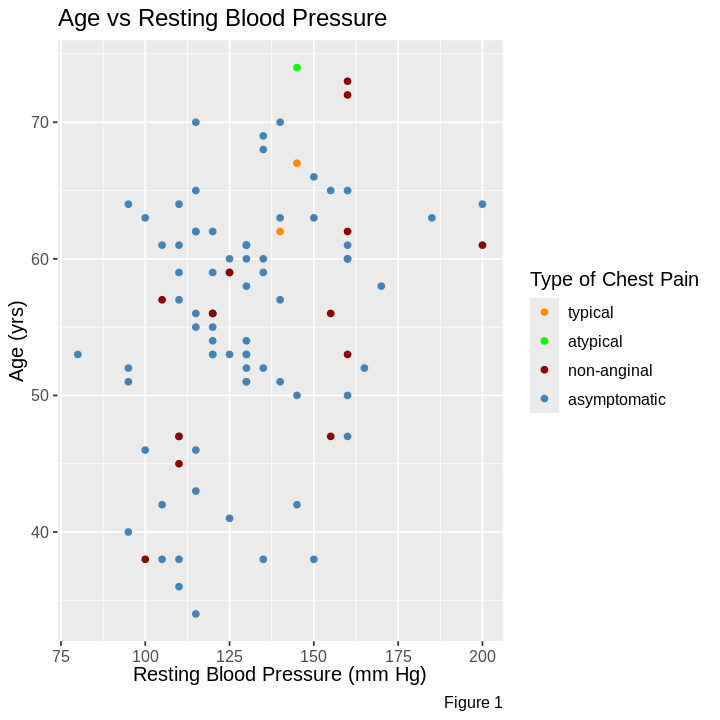

In [5]:
options(repr.plot.height = 6, repr.plot.width = 6)

# create scatter plot of heart disease training set
# plot age vs. resting blood pressure for inital visualization
heart_disease_plot <- heart_train |>
  ggplot(aes(x = blood_pressure_mm_Hg, y = age, color=chest_pain_ctg)) +
  geom_point() +
  labs(color = "Type of Chest Pain",  x = "Resting Blood Pressure (mm Hg)", y = "Age (yrs)", 
       caption = "Figure 1") +
  scale_color_manual(values = c("darkorange", "green", "darkred", "steelblue")) +
  theme(text = element_text(size = 12)) +
  ggtitle("Age vs Resting Blood Pressure")


heart_disease_plot

##### Figure 1: Heart Training Dataset colour-coded by Chest Pain Type

In [6]:
# proportion of the catgeories of chest pain within the data set
pain_proportions <- heart_train |>
                      group_by(chest_pain_ctg) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_train))
pain_proportions

chest_pain_ctg,n,percent
<fct>,<int>,<dbl>
typical,2,2.222222
atypical,3,3.333333
non-anginal,13,14.444444
asymptomatic,72,80.000000


##### Table 3: Percentage of each chest pain type in heart_train dataset.

In [7]:
# show the accuracy of our prelimiary classifier 
# after cross validation taking in numbers of neighbours from 2 to 6.

# create recipe
heart_recipe <- recipe(chest_pain_ctg ~ ., data = heart_train) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# cross-validation for best number of neighbours
heart_vfold <- vfold_cv(heart_train, v = 5, strata = chest_pain_ctg)
k_vals <- tibble(neighbors = seq(from = 2, to = 6, by = 1))

# collect metrics for each number of neighbours
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics()

# get their accuracies
accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | warning: No observations were detected in `truth` for level(s): 'typical', 'atypical'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: No observations were detected in `truth` for level(s): 'atypical'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
→ C | warning: No observations were detected in `truth` for level(s): 'typical'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1   C: x1

There were issues with some computations   A: x2   B: x1   C: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.6754730,5,0.05496034,Preprocessor1_Model1
3,accuracy,multiclass,0.8015480,5,0.03424546,Preprocessor1_Model2
4,accuracy,multiclass,0.7687994,5,0.03615984,Preprocessor1_Model3
5,accuracy,multiclass,0.8003784,5,0.01175263,Preprocessor1_Model4
6,accuracy,multiclass,0.8003784,5,0.01175263,Preprocessor1_Model5


##### Table 4: Cross-validation accuracies of each # of Neighbours

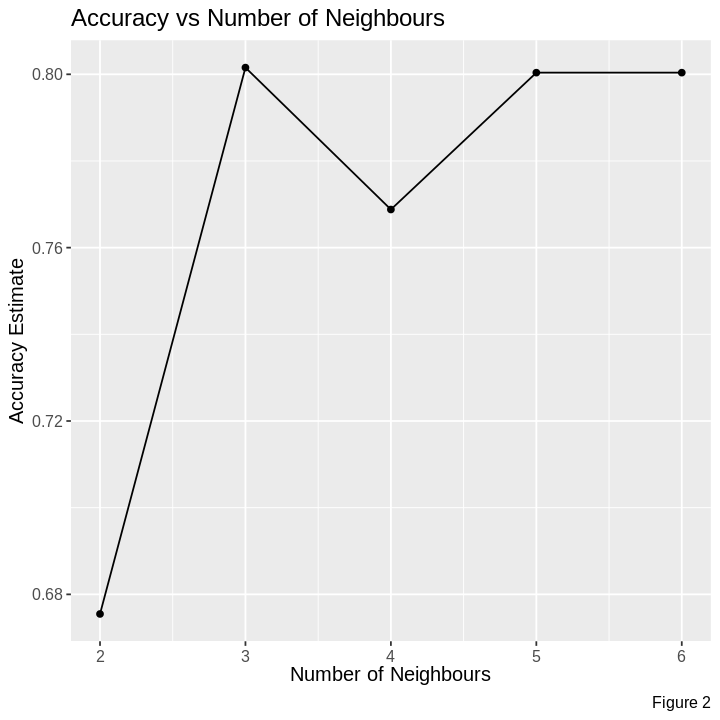

In [8]:
# Let's create a plot that compares the accuracies of the model when choosing different numbers of neighbours
options(repr.plot.height = 6, repr.plot.width = 6)
neighbours_plot <- accuracies |> ggplot(aes(x=neighbors, y=mean)) + 
                                    geom_point() + geom_line() + 
                                    labs(x="Number of Neighbours", y = "Accuracy Estimate", caption="Figure 2") +
                                    ggtitle("Accuracy vs Number of Neighbours") +
                                    theme(text = element_text(size = 12))
neighbours_plot

##### Figure 2: Accuracy vs Number of Neighbours for cross-validation results

In [9]:
# get the # of neighbours with the best performance
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 3

In [10]:
# Let's use the best # of neighbours we found to build our new classifier

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

best_fit <- workflow() |>
                add_model(best_spec) |>
                add_recipe(heart_recipe) |>
                fit(data=heart_train)

In [11]:
# Let's evaluate the performance of our newly-constructed classification model!

# make predictions and bind results to heart_test
heart_test_predictions <- predict(best_fit, heart_test) |>
  bind_cols(heart_test)

# get the model's accuracy
heart_test_predictions |>
  metrics(truth = chest_pain_ctg, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7741935


##### Table 5: Accuracy of classifier with the best # of neighbours

### 77.4% accuracy for predicting the type of chest pain that patients are experiencing from their blood pressure and age.

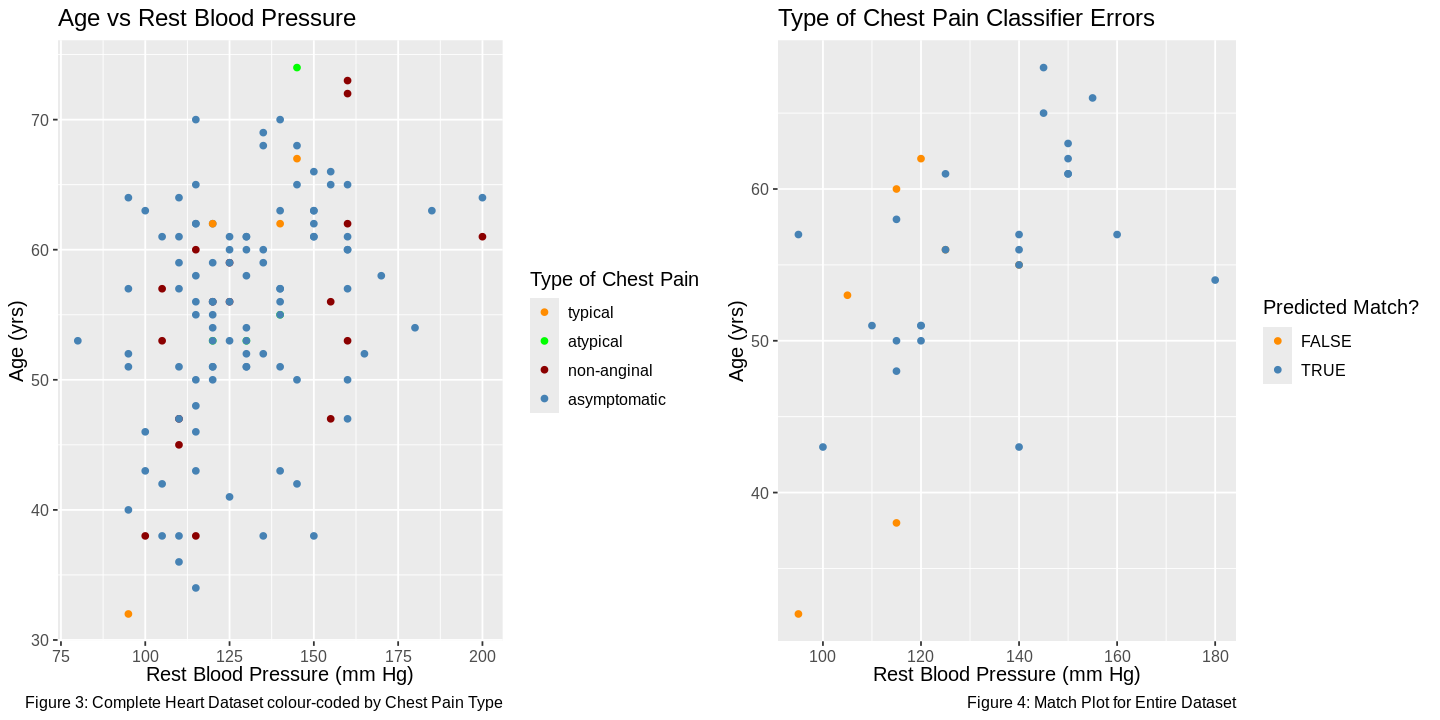

In [13]:
# NEXT STEP, we use our classifier to classify the test set


options(repr.plot.height = 6, repr.plot.width = 12)

# create scatter plot of classifications for the entire dataset
heart_plot <- heart_data |>
  ggplot(aes(x = blood_pressure_mm_Hg, y = age, color=chest_pain_ctg)) +
  geom_point() +
  labs(color = "Type of Chest Pain",  x="Rest Blood Pressure (mm Hg)", y="Age (yrs)", 
       caption = "Figure 3: Complete Heart Dataset colour-coded by Chest Pain Type") +
  scale_color_manual(values = c("darkorange", "green", "darkred", "steelblue")) +
  theme(text = element_text(size = 12)) +
  ggtitle("Age vs Rest Blood Pressure")


heart_all_predicted <- predict(best_fit, heart_test) |>
    bind_cols(heart_test)

heart_all_predicted_with_match <- heart_all_predicted |> mutate(match=(.pred_class==chest_pain_ctg))

# create a scatterplot which shows which points our model predicted correctly vs. incorrectly

heart_match_plot <- heart_all_predicted_with_match |>
  ggplot(aes(x = blood_pressure_mm_Hg, y = age, color=match)) +
  geom_point() +
  labs(color = "Predicted Match?",  x="Rest Blood Pressure (mm Hg)", y="Age (yrs)", 
       caption = "Figure 4: Match Plot for Entire Dataset") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
  ggtitle("Type of Chest Pain Classifier Errors")

grid.arrange(heart_plot, heart_match_plot, ncol = 2)



In [14]:
# confusion matrix for heart_all_predicted

confusion <- heart_all_predicted |> conf_mat(truth = chest_pain_ctg, estimate = .pred_class)

confusion

              Truth
Prediction     typical atypical non-anginal asymptomatic
  typical            0        0           0            0
  atypical           0        0           0            0
  non-anginal        0        0           0            0
  asymptomatic       2        1           4           24

**Discussion:**

Originally, we expected to find a trend where, as age and resting blood pressure of a patient increases, the number of cases of chest pain increases as well. This was predicted because as age and blood pressure increases, cardiac complications tend to increase as the arteries become less efficient which leads to chest pain. As seen in Figure 1 of our analysis, this prediction seems to stand true; the number of cases of chest pain seems to see a significant increase after age 50 with very few cases below 40. A ‘normal’ blood pressure level is less than 120mmHg (High Blood Pressure Symptoms and Causes, 2021). In this same figure, it is clear that there is an influx of chest pain cases with blood pressure over 120mmHg, indicating increased blood pressure does in fact correlate with increased cases of chest pain. We also predicted that we would see a very high proportion of asymptomatic cases, which is true as displayed in Table 3 (asymptomatic cases make up ~80% of data). 

These findings could prove to be helpful when it comes to the diagnosis of chest pain. Though the accuracy of the model is not 100%, rather 77.4%, it can still provide a good baseline for doctors to use when trying to diagnose a patient. By simply knowing the blood pressure and age of an individual, it is possible to give a general prediction for the type of chest pain a patient may be experiencing. Though the doctor cannot be certain, the doctor would be able to provide further tests to confirm this prediction. This model has the capability to save a lot of time and resources for diagnosis as the doctor can order specific tests to confirm the prediction rather than doing rounds of tests for all the different options of chest pain. This would make patients able to receive treatments or medications they may need faster and reduce the amount of time spent in clinics and doctors’ offices which would allow for the care of more patients, something we struggle with daily in Canada and around the world. A common reason people ignore aches and pains is to avoid going to the doctor as it can take months to get results in some areas and be far too expensive in others, or even both! This model can help speed up the diagnosis process and hopefully get more people to seek physician care when necessary, resulting in less fatalities caused by heart conditions. Furthermore, individuals who may have a hard time communicating their symptoms or may speak a different language than their primary care provider would have an easier time being diagnosed through this predictive model. For example, a patient could describe the symptoms of a typical angina when they are actually experiencing the symptoms of atypical angina. With their blood pressure and age they are predicted to have atypical anginal chest pain. In this case, the doctor could further examine the patient to make sure they are given the correct medication.

Future Question: Is a specific type of angina more likely to be linked to a heart attack? Are there other predictors which can be used to more accurately diagnose chest pain?

Finally, there are a few factors that could have improved our predictive model and some limitations to our model in general. Using more data points to train our model could have helped to improve the accuracy of our model. This dataset only had 143 patients, meaning the model was only trained using ~107 pieces of data which is not ideal. Perhaps with more data we might have had higher accuracy, specifically with data not in the asymptomatic category. The lack of data also posed issues when visualizing our match plot. Ideally we would have only used the testing data for the final classification; however, due to the lack of testing data, this could not be done. Furthermore, there are some limitations to this classification model; it cannot necessarily be used everywhere around the world as it is only based on data from Switzerland. It is possible that some other countries may have higher blood pressure on average which does not relate to heart disease, so this model may not be a good baseline there. In other words, this model may not be transferable from country to country. Finally it is evident from our model that it does a great job predicting asymptomatic chest pain but does not do as great of a job predicting other forms of chest pain. For example, it only classified 4 data points correctly which were not in the ‘asymptomatic’ category. This is likely because the majority of our data is based on patients with asymptomatic chest pain; the model can only do what the data allows it to. On the positive side, it is very important to be able to diagnose asymptomatic chest pain as this is a sign of silent heart attack or silent Ischemia which may account for 50-80% of heart attacks (Silent Heart Attack, 2024). 

To conclude, age and resting blood pressure can be used to classify the type of chest pain seen in patients admitted to university hospitals in Zurich and Basel. However, the accuracy of the classification model is not so high that it can be the only method used to identify types of chest pain; it can be used as a baseline in addition to other confirmatory tests for an accurate and fast diagnosis of chest pain.

**Bibliography:**

“Angina Pectoris.” Johns Hopkins Medicine, 2 July 2020, www.hopkinsmedicine.org/health/conditions-and-diseases/angina-pectoris. 

Geyser, Mimi, and Selma Smith. “Chest Pain Prevalence, Causes, and Disposition in the Emergency Department of a Regional Hospital in Pretoria.” African Journal of Primary Health Care & Family Medicine, U.S. National Library of Medicine, 10 June 2016, www.ncbi.nlm.nih.gov/pmc/articles/PMC4926718/. 

Gul, Zunaira. “Silent Myocardial Ischemia.” StatPearls [Internet]., U.S. National Library of Medicine, 19 Jan. 2023, www.ncbi.nlm.nih.gov/books/NBK536915/#:~:text=Silent%20myocardial%20ischemia%20is%20a,%2C%20nausea%2C%20diaphoresis%2C%20etc.

“Heart Disease.” UCI Machine Learning Repository, archive.ics.uci.edu/dataset/45/heart+disease. Accessed 11 Apr. 2024. “Arteries.” Center for Healthy Aging, 23 Nov. 2021, www.research.colostate.edu/healthyagingcenter/aging-basics/arteries/#:~:text=This%20blood%20flow%20allows%20muscles,dilation%20and%20less%20blood%20flow. 

“High Blood Pressure Symptoms and Causes.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 18 May 2021, www.cdc.gov/bloodpressure/about.htm#:~:text=A%20normal%20blood%20pressure%20level%20is%20less%20than%20120%2F80%20mmHg.&text=No%20matter%20your%20age%2C%20you,pressure%20in%20a%20healthy%20range. 

“Noncardiac Chest Pain: Symptoms, Causes and Treatments.” Cleveland Clinic, my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain. Accessed 11 Apr. 2024.

“Silent Heart Attack: Causes, Symptoms and Treatment.” Cleveland Clinic, my.clevelandclinic.org/health/diseases/21630-silent-heart-attack. Accessed 11 Apr. 2024. 

“What Is Atypical Chest Pain?” Cleveland Clinic, my.clevelandclinic.org/health/symptoms/24935-atypical-chest-pain. Accessed 11 Apr. 2024. 